In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.7.1+cpu
     ━━━━━

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
im_1_path = '/content/61e1edn-eel-ac-sl1454-500x500.jpg'

In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''

    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [ ]:
result = recognize_text(im_1_path)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

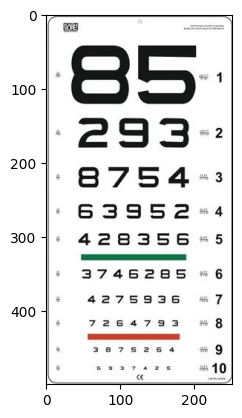

In [ ]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''

    #list for retrieve result
    global result_append
    result_append = []
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display
            print(f'Detected text: {text} (Probability: {prob:.2f})')
            result_append.append(text)
            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)

    # show and save image
    axarr[1].imshow(img)
    #plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: 85 (Probability: 0.99)
Detected text: 293 (Probability: 1.00)
Detected text: 8754 (Probability: 1.00)
Detected text: 63952 (Probability: 1.00)
Detected text: 4 28356 (Probability: 0.88)
Detected text: 4 2 7 59 3 6 (Probability: 0.66)
Detected text: 2 6 (Probability: 0.97)
Detected text: 4 7 9 (Probability: 1.00)
Detected text: 10 (Probability: 1.00)


<Figure size 640x480 with 0 Axes>

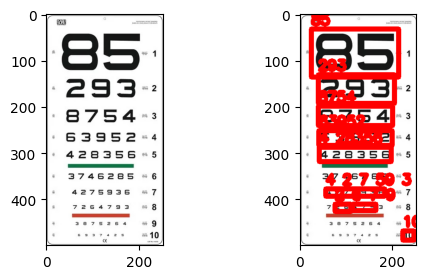

In [ ]:
overlay_ocr_text(im_1_path, '1_carplate')

In [ ]:
result_append

['85', '293', '8754', '63952', '4 28356', '4 2 7 59 3 6', '2 6', '4 7 9', '10']

In [ ]:
!pip install ffmpeg-python
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.5 MB/s eta 0:00:00


In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
! pip install pythainlp
! pip install deepcut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00


In [ ]:
import numpy
import torch
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Wav2Vec2Tokenizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
from torch.utils.data import Dataset, random_split
from transformers import GPT2Tokenizer, TrainingArguments, Trainer, GPT2LMHeadModel, AutoTokenizer
from transformers import pipeline
import requests
import time
import scipy
from pythainlp import sent_tokenize, word_tokenize

In [ ]:
audio, sr = get_audio()

In [ ]:
scipy.io.wavfile.write('recording.wav', sr, audio)

In [ ]:
model_name = "wannaphong/wav2vec2-large-xlsr-53-th-cv8-deepcut"
tokenizer = Wav2Vec2Tokenizer.from_pretrained(model_name)
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name)
def transcribe_audio(audio_file):
    # Load the audio file and resample it to the expected sampling rate
    audio_input, original_sampling_rate = torchaudio.load(audio_file)
    resampler = torchaudio.transforms.Resample(original_sampling_rate, processor.feature_extractor.sampling_rate)
    audio_input = resampler(audio_input)

    # Preprocess the audio input (normalize, resample, etc.)
    input_signal = processor(audio_input, return_tensors="pt").input_values

    # Remove the extra dimension from the input tensor
    input_signal = input_signal.squeeze(0)

    # Convert the preprocessed audio to a tensor and feed it to the model
    logits = model(input_signal).logits

    # Use the tokenizer to get the predicted transcription
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = tokenizer.batch_decode(predicted_ids)[0]

    return transcription

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:792: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(


In [ ]:
def get_text() -> str:
  audio, sr = get_audio()
  scipy.io.wavfile.write('recording.wav', sr, audio)
  transcribe = transcribe_audio('/content/recording.wav')
  transcribe_segmented = word_tokenize(transcribe, keep_whitespace=False)
  text_sample = " ".join(transcribe_segmented)
  return text_sample


'สวัสดี ครับ หนึ่ง สอง สาม สี่ แปด ห้า'

# Sort out unused word

In [ ]:
def process_text(text_sample: str) -> str:
    key = ['หนึ่ง','สอง','สาม','สี่','ห้า','หก','เจ็ด','แปด','เก้า']
    result = []
    text, *_ = text_sample[0]
    for i, word in enumerate(text_sample.split(" ")):
      if word in key:
        result.append(word)
    #result = ['หนึ่ง', 'สอง', 'สาม', 'สี่']
    hyp_text = ""
    for i, word in enumerate(result):
      if(i < (len(result) - 1)):
        hyp_text += word + " "
      else:
        hyp_text += word
    #print(f"ASR hypothesis: {hyp_text}")
    return hyp_text

ASR hypothesis: หนึ่ง สอง สาม สี่ แปด ห้า


In [ ]:
# ref_text = result_append[0]
# ref_len = len(ref_text.split(" "))
# hyp_len = len(result)
# checked_index =[]
# checked_index2 =[]
# print(ref_text)
# print(ref_len,hyp_len)

85
1 6


In [ ]:
def evaluation_score(ref_len, hyp_len, hyp_text, ref_text):
  global correct
  correct = []
  checked_index = []
  checked_index2 = []
  if (ref_len == hyp_len):
    print("ref_len == hyp_len")
    for i, hyp in enumerate(hyp_text.split(" ")):
      if hyp in ref_text.split(" "):
        print("true")
        correct.append(hyp)
      else:
        print(f"sub @ index {i} by {hyp}")

  elif (ref_len < hyp_len):
    print("ref_len < hyp_len")
    for i, ref in enumerate(ref_text.split(" ")):
      for j, hyp in enumerate(hyp_text.split(" ")):
        if hyp in ref:
          print(f"true {hyp}")
          correct.append(hyp)
          checked_index.append(j)
          break
        elif (hyp not in ref) & (j>=i) & (j not in checked_index):
          print(f"insert @ index {i} by {hyp}")


  #Unfinished for same number
  elif (ref_len > hyp_len):
    print("ref_len > hyp_len")
    for i, ref in enumerate(ref_text.split(" ")):
      for j, hyp in enumerate(hyp_text.split(" ")):
        if (hyp in ref):
          print(f"true {hyp}")
          correct.append(hyp)
          checked_index.append(j)
          break
        elif (hyp not in ref) & (j>=i) & (j not in checked_index):
          print(f"Delete @ index {i} ")
  # print(expected == len(correct
  # print(expected, len(correct))
  print("=========================================")

In [ ]:
#process digit to thai words
def process_digit_thai(digits: int|str) -> str:
  digits = str(digits).strip()
  result_gathering = []
  digit_dict = {"1":'หนึ่ง',"2":'สอง',"3":'สาม',"4":'สี่',"5":'ห้า',"6":'หก',"7":'เจ็ด',"8":'แปด',"9":'เก้า'}
  for i_ in digits:
    result_gathering.append(digit_dict.get(i_,'0'))
  return " ".join(result_gathering)

In [ ]:
print(f"There are #{len(result_append)} lines ")
for i in result_append:
  print(i)
  speech_text = get_text()
  ref_text = process_digit_thai(i)
  hyp_text = process_text(speech_text)
  print(f"Speech text: {speech_text}")
  print(f"hyp_text: {hyp_text}")
  print(f"ref_text: {ref_text}")
  print("=========================================")
  evaluation_score(ref_len=len(ref_text), hyp_len=len(hyp_text), hyp_text=hyp_text, ref_text=ref_text)

print(f"Score: {len(correct)}")
print(correct)

There are #9 lines 
85


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: แปด ห้า
hyp_text: แปด ห้า
ref_text: แปด ห้า
ref_len == hyp_len
true
true
293


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: สอง เก้า สาม
hyp_text: สอง เก้า สาม
ref_text: สอง เก้า สาม
ref_len == hyp_len
true
true
true
8754


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: แปด เจ็ด ห้า สี่
hyp_text: แปด เจ็ด ห้า สี่
ref_text: แปด เจ็ด ห้า สี่
ref_len == hyp_len
true
true
true
true
63952


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: หก สาม เก้า ห้า สอง
hyp_text: หก สาม เก้า ห้า สอง
ref_text: หก สาม เก้า ห้า สอง
ref_len == hyp_len
true
true
true
true
true
4 28356


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: สี่ สอง แปด สาม ห้า หก
hyp_text: สี่ สอง แปด สาม ห้า หก
ref_text: สี่ 0 สอง แปด สาม ห้า หก
ref_len > hyp_len
true สี่
Delete @ index 1 
Delete @ index 1 
Delete @ index 1 
Delete @ index 1 
Delete @ index 1 
true สอง
true แปด
true สาม
true ห้า
true หก
4 2 7 59 3 6


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: สี่ สอง เจ็ด ห้า เก้า สาม หก
hyp_text: สี่ สอง เจ็ด ห้า เก้า สาม หก
ref_text: สี่ 0 สอง 0 เจ็ด 0 ห้า เก้า 0 สาม 0 หก
ref_len > hyp_len
true สี่
Delete @ index 1 
Delete @ index 1 
Delete @ index 1 
Delete @ index 1 
Delete @ index 1 
Delete @ index 1 
true สอง
Delete @ index 3 
Delete @ index 3 
Delete @ index 3 
Delete @ index 3 
true เจ็ด
Delete @ index 5 
Delete @ index 5 
true ห้า
true เก้า
true สาม
true หก
2 6


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: สอง หก
hyp_text: สอง หก
ref_text: สอง 0 หก
ref_len > hyp_len
true สอง
Delete @ index 1 
true หก
4 7 9


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: สี่ เจ็ด เก้า
hyp_text: สี่ เจ็ด เก้า
ref_text: สี่ 0 เจ็ด 0 เก้า
ref_len > hyp_len
true สี่
Delete @ index 1 
Delete @ index 1 
true เจ็ด
true เก้า
10


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Speech text: หนึ่ง ศูนย์
hyp_text: หนึ่ง
ref_text: หนึ่ง 0
ref_len > hyp_len
true หนึ่ง
Score: 1
['หนึ่ง']
